In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns     # graphs and charts
import matplotlib.pyplot as plt   # graphs and charts

# magic command for Jupyter Notebook that shows charts
%matplotlib inline


from sklearn import preprocessing    # prepare or "clean" data


# hides warning messages, so they don’t clutter the notebook output.
import warnings

warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:

!pip install gdown

import gdown

# Download the CSV to local runtime
output_path_trans_train = "train_transaction.csv"
output_path_ident_train = "train_identity.csv"

output_path_trans_test = "test_transaction.csv"
output_path_ident_test = "test_identity.csv"

gdown.download("https://drive.google.com/uc?export=download&id=1uo0EBN25MkF54Ff87onrOKfhNK3XuvED", output_path_trans_train , quiet=False)
gdown.download("https://drive.google.com/uc?export=download&id=1NVltXXsjQ8-HtYYJNX3Nw3b643bgxx_9", output_path_trans_test , quiet=False)
gdown.download("https://drive.google.com/uc?export=download&id=1P9OPmgZ3rE_B7kfVcl7ujVuH5PTUMR8m", output_path_ident_train , quiet=False)
gdown.download("https://drive.google.com/uc?export=download&id=1IFEpCmYM3nLODnUNPFAYFCOwYU_MbwXt", output_path_ident_test , quiet=False)


# Load it with pandas
train_transaction = pd.read_csv(output_path_trans_train)
test_transaction = pd.read_csv(output_path_trans_test)

train_identity = pd.read_csv(output_path_ident_train)
test_identity = pd.read_csv(output_path_ident_test)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1uo0EBN25MkF54Ff87onrOKfhNK3XuvED
From (redirected): https://drive.google.com/uc?export=download&id=1uo0EBN25MkF54Ff87onrOKfhNK3XuvED&confirm=t&uuid=112e133b-2c03-4b1c-be47-ddcd8bd441a4
To: /content/train_transaction.csv
100%|██████████| 683M/683M [00:02<00:00, 245MB/s]
Downloading...
From (original): https://drive.google.com/uc?export=download&id=1NVltXXsjQ8-HtYYJNX3Nw3b643bgxx_9
From (redirected): https://drive.google.com/uc?export=download&id=1NVltXXsjQ8-HtYYJNX3Nw3b643bgxx_9&confirm=t&uuid=5adbace9-fd88-45ad-ae68-3e8e6e9b9097
To: /content/test_transaction.csv
100%|██████████| 613M/613M [00:02<00:00, 293MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1P9OPmgZ3rE_B7kfVcl7ujVuH5PTUMR8m
To: /content/train_identity.csv
100%|██████████| 26.5M/26.5M [00:00<00:00, 112MB/s] 
Downloading...
From: https://drive.google.com/uc?export=download&id=1IFEpCmYM3nLODnUNPFAYFCOwYU_MbwXt
To: /content

In [ ]:
# Checkign if all Transactions IDs from transaction dataset are in identity dataset

print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

144233
141907


In [ ]:
# shape, this gives the dimensions of the dataset

print('Dimensions of the Train Identity set:',train_transaction.shape)

print('Dimensions of the Train transaction set:',train_identity.shape)

Dimensions of the Train Identity set: (590540, 394)
Dimensions of the Train transaction set: (144233, 41)


In [ ]:
train_df = train_transaction.merge(train_identity, on="TransactionID", how="left")
test_df = test_transaction.merge(test_identity, on="TransactionID", how="left")

print("Train Shape:",train_df.shape)
print("Test Shape:",test_df.shape)

Train Shape: (590540, 434)
Test Shape: (506691, 433)


In [ ]:
# dataset properties before cleaning - train_df
print("=== Dataset Properties BEFORE Cleaning: train_df ===")
print(f"Shape: {train_df.shape}")
print(f"Number of rows: {train_df.shape[0]}")
print(f"Number of columns: {train_df.shape[1]}")
print(f"Columns: {train_df.columns.tolist()}")
print(f"Data types:\n{train_df.dtypes}")
print(f"Number of missing values:\n{train_df.isnull().sum()}")
if 'isFraud' in train_df.columns:
    print(f"Number of fraud cases (isFraud==1): {train_df['isFraud'].sum()}")
    print(f"Number of non-fraud cases (isFraud==0): {(train_df['isFraud'] == 0).sum()}")
    print(f"Fraud rate: {train_df['isFraud'].mean()*100:.4f}%")
else:
    print("Column 'isFraud' not found in train_df.")
print("="*80)

# dataset properties before cleaning - test_df
print("=== Dataset Properties BEFORE Cleaning: test_df ===")
print(f"Shape: {test_df.shape}")
print(f"Number of rows: {test_df.shape[0]}")
print(f"Number of columns: {test_df.shape[1]}")
print(f"Columns: {test_df.columns.tolist()}")
print(f"Data types:\n{test_df.dtypes}")
print(f"Number of missing values:\n{test_df.isnull().sum()}")
if 'isFraud' in test_df.columns:
    print(f"Number of fraud cases (isFraud==1): {test_df['isFraud'].sum()}")
    print(f"Number of non-fraud cases (isFraud==0): {(test_df['isFraud'] == 0).sum()}")
    print(f"Fraud rate: {test_df['isFraud'].mean()*100:.4f}%")
else:
    print("Column 'isFraud' not found in test_df.")
print("="*80)

=== Dataset Properties BEFORE Cleaning: train_df ===
Shape: (590540, 434)
Number of rows: 590540
Number of columns: 434
Columns: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63',

In [ ]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
# Print Shapes

print("Train Dataset shape: ", train_df.shape)

Train Dataset shape:  (590540, 434)


In [ ]:
# creates a DataFrame of the same shape:
# null_percent will be a Series where each entry gives the percentage of missing (null/NaN) values in each column of train_df
null_percent = train_df.isnull().mean() * 100

In [ ]:
# Creates a boolean Series that is True for columns where the percentage of missing values is greater than 70%.
columns_with_high_null = null_percent[null_percent > 70].index

In [ ]:
columns_with_high_null

Index(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14',
       'V138',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=208)

In [ ]:
df_cleaned = train_df.loc[:, null_percent <= 70]

In [ ]:
df_cleaned

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [ ]:
import pandas as pd
from IPython.display import display

# === Dataset Properties AFTER Cleaning ===

# Summary
summary_df = pd.DataFrame({
    'Property': ['Shape', 'Number of rows', 'Number of columns'],
    'Value': [str(df_cleaned.shape), df_cleaned.shape[0], df_cleaned.shape[1]]
})

# Columns
columns_df = pd.DataFrame({'Columns': df_cleaned.columns})

# Data Types
dtypes_df = pd.DataFrame({
    'Column': df_cleaned.columns,
    'Data Type': df_cleaned.dtypes.values
})

# Missing Values
missing_df = pd.DataFrame({
    'Column': df_cleaned.columns,
    'Missing Values': df_cleaned.isnull().sum().values
})

# Fraud Data Summary
if 'isFraud' in df_cleaned.columns:
    fraud_cases = df_cleaned['isFraud'].sum()
    non_fraud_cases = (df_cleaned['isFraud'] == 0).sum()
    fraud_rate = df_cleaned['isFraud'].mean() * 100
    fraud_df = pd.DataFrame({
        'Metric': [
            'Number of fraud cases (isFraud==1)',
            'Number of non-fraud cases (isFraud==0)',
            'Fraud rate (%)'
        ],
        'Value': [fraud_cases, non_fraud_cases, f'{fraud_rate:.4f}']
    })
else:
    fraud_df = pd.DataFrame({
        'Metric': ['isFraud column not found'],
        'Value': ['N/A']
    })

print("=== Dataset Properties AFTER Cleaning ===\n")

print("Summary:")
display(summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
]).set_properties(**{'text-align': 'center'}))

print("\nColumns:")
display(columns_df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
]).set_properties(**{'text-align': 'center'}))

print("\nData Types:")
display(dtypes_df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
]).set_properties(**{'text-align': 'center'}))

print("\nMissing Values:")
display(missing_df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
]).set_properties(**{'text-align': 'center'}))

print("\nFraud Data Summary:")
display(fraud_df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
]).set_properties(**{'text-align': 'center'}))

print("="*50)

=== Dataset Properties AFTER Cleaning ===

Summary:


,Property,Value
0,Shape,"(590540, 226)"
1,Number of rows,590540
2,Number of columns,226



Columns:


,Columns
0,TransactionID
1,isFraud
2,TransactionDT
3,TransactionAmt
4,ProductCD
5,card1
6,card2
7,card3
8,card4
9,card5



Data Types:


,Column,Data Type
0,TransactionID,int64
1,isFraud,int64
2,TransactionDT,int64
3,TransactionAmt,float64
4,ProductCD,object
5,card1,int64
6,card2,float64
7,card3,float64
8,card4,object
9,card5,float64



Missing Values:


,Column,Missing Values
0,TransactionID,0
1,isFraud,0
2,TransactionDT,0
3,TransactionAmt,0
4,ProductCD,0
5,card1,0
6,card2,8933
7,card3,1565
8,card4,1577
9,card5,4259



Fraud Data Summary:


,Metric,Value
0,Number of fraud cases (isFraud==1),20663
1,Number of non-fraud cases (isFraud==0),569877
2,Fraud rate (%),3.4990


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 226 entries, TransactionID to V321
dtypes: float64(209), int64(4), object(13)
memory usage: 1018.2+ MB


In [ ]:
# calculates the total number of missing values (NaN or None) in the entire DataFrame df_cleaned
df_cleaned.isnull().sum().sum()

np.int64(16088043)

In [ ]:
data_train = df_cleaned.copy()

In [ ]:
# replaces all missing values (NaN or None) in the data_train DataFrame with 0
data_train.fillna(0, inplace=True)

In [ ]:
data_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,0.0,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,0.0,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [ ]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
V317,590540.0,2.476017e+02,3.980003e+03,0.000,0.000,0.000,0.00,1.340210e+05
V318,590540.0,1.621501e+02,2.793315e+03,0.000,0.000,0.000,0.00,9.847600e+04
V319,590540.0,1.837210e+01,3.323015e+02,0.000,0.000,0.000,0.00,1.040600e+05
V320,590540.0,4.207228e+01,4.734945e+02,0.000,0.000,0.000,0.00,1.040600e+05


In [ ]:
data_train['isFraud'].unique()

array([0, 1])

In [ ]:
data_train['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

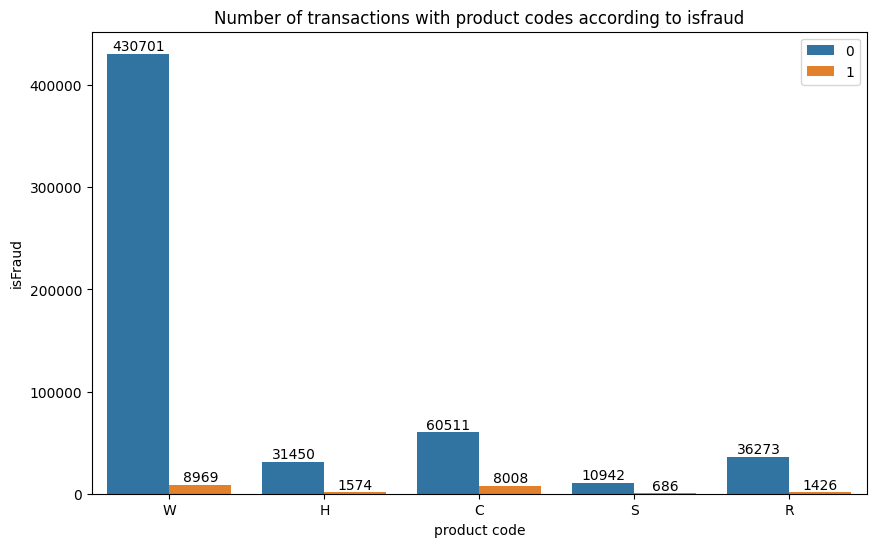

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ProductCD', hue='isFraud', data=data_train)
plt.title('Number of transactions with product codes according to isfraud')
plt.xlabel('product code')
plt.ylabel('isFraud')
plt.legend(['0', '1'])

# Add numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
# returns the distinct unique values in the 'card4' column of the data_train DataFrame
data_train['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', 0],
      dtype=object)

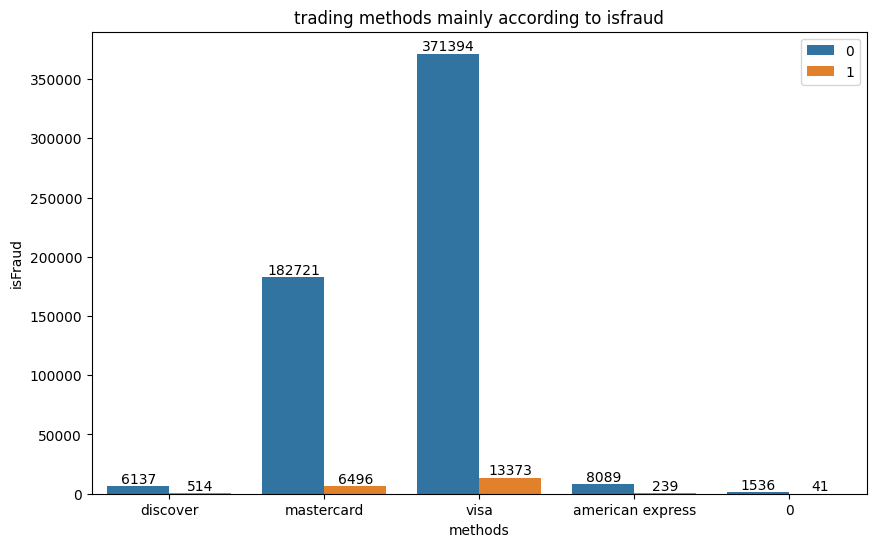

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='card4', hue='isFraud', data=data_train)
plt.title('trading methods mainly according to isfraud')
plt.xlabel('methods')
plt.ylabel('isFraud')
plt.legend(['0', '1'])

# Add numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
data_train['card6'].unique()

array(['credit', 'debit', 0, 'debit or credit', 'charge card'],
      dtype=object)

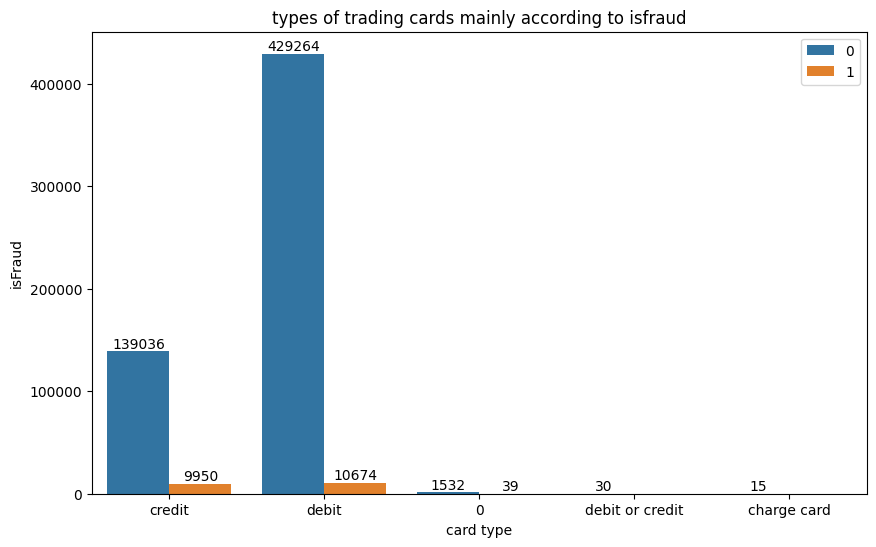

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='card6', hue='isFraud', data=data_train)
plt.title('types of trading cards mainly according to isfraud')
plt.xlabel('card type')
plt.ylabel('isFraud')
plt.legend(['0', '1'])

# Add numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
data_train['P_emaildomain'].unique()

array([0, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

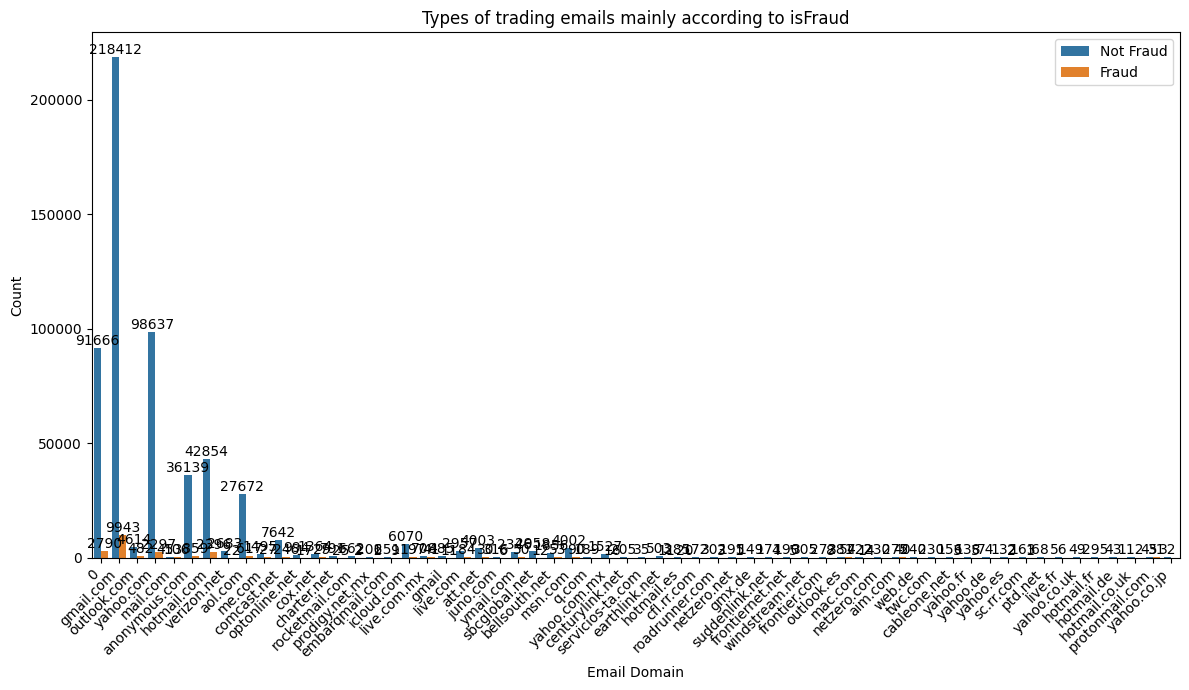

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='P_emaildomain', hue='isFraud', data=data_train)
plt.title('Types of trading emails mainly according to isFraud')
plt.xlabel('Email Domain')
plt.ylabel('Count')
plt.legend(['Not Fraud', 'Fraud'])

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

In [ ]:
data_train['dist1'].unique()

array([  19.,    0.,  287., ..., 4851., 2042., 4728.])

In [ ]:
object_columns = data_train.select_dtypes(include=['object'])

In [ ]:
print("Columns with Object type:")
print(object_columns)

Columns with Object type:
       ProductCD       card4   card6 P_emaildomain M1 M2 M3  M4 M5 M6 M7 M8 M9
0              W    discover  credit             0  T  T  T  M2  F  T  0  0  0
1              W  mastercard  credit     gmail.com  0  0  0  M0  T  T  0  0  0
2              W        visa   debit   outlook.com  T  T  T  M0  F  F  F  F  F
3              W  mastercard   debit     yahoo.com  0  0  0  M0  T  F  0  0  0
4              H  mastercard  credit     gmail.com  0  0  0   0  0  0  0  0  0
...          ...         ...     ...           ... .. .. ..  .. .. .. .. .. ..
590535         W        visa   debit             0  T  T  T  M0  T  F  F  F  T
590536         W  mastercard   debit     gmail.com  T  F  F  M0  F  T  F  F  F
590537         W  mastercard   debit     gmail.com  T  F  F   0  0  T  0  0  0
590538         W  mastercard   debit       aol.com  T  T  T  M0  F  T  0  0  0
590539         W  mastercard  credit     gmail.com  T  F  F   0  0  T  F  F  F

[590540 rows x 13 columns

In [ ]:
data_train['isFraud'].value_counts()

,count
isFraud,
0,569877
1,20663


In [ ]:
res = data_train['isFraud']

In [ ]:
res

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
590535,0
590536,0
590537,0
590538,0


In [ ]:
plt.show()

In [ ]:
data_train.shape

(590540, 226)

In [ ]:
# non fradulent transactions are
100*(569877/590540)

96.50099908558268

In [ ]:
columns_to_print = ['card1','card2','card3','card4','card5','card6']
values = data_train[columns_to_print]

In [ ]:
values

,card1,card2,card3,card4,card5,card6
0,13926,0.0,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,0.0,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


In [ ]:
columns_address = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
found_address = df_cleaned[columns_address]

In [ ]:
found_address

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


In [ ]:
columns_transaction_day = ['D1', 'D2','D3','D4','D5','D15']
values_day = df_cleaned[columns_transaction_day]

In [ ]:
values_day

,D1,D2,D3,D4,D5,D15
0,14.0,NaN,13.0,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
590535,29.0,29.0,30.0,NaN,NaN,56.0
590536,0.0,NaN,NaN,0.0,NaN,0.0
590537,0.0,NaN,NaN,0.0,NaN,0.0
590538,22.0,22.0,0.0,22.0,0.0,22.0


In [ ]:
columns_matchs = ['M1','M2','M3','M4','M5','M6','M7','M8','M9']
values_matchs = df_cleaned[columns_matchs]

In [ ]:
values_matchs

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,T,T,T,M0,F,T,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
# Converts categorical text/nominal data into numerical labels
label_encoder = LabelEncoder()

In [ ]:
# converts all integer and float values in the DataFrame to strings while make sure to keeping the other data
data_train = data_train.applymap(lambda x: str(x) if isinstance(x, (int, float)) else x)

In [ ]:
object_columns = data_train.select_dtypes(include=['object']).columns

In [ ]:
for col in object_columns:
    data_train[col] = label_encoder.fit_transform(data_train[col])

print("DataFrame after Label Encoding:")
print(data_train)

DataFrame after Label Encoding:
        TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  \
0                   0        0         523158           17362          4   
1                   1        0         523162            8716          4   
2                   2        0         523631           15968          4   
3                   3        0         523809           14443          4   
4                   4        0         523840           14443          1   
...               ...      ...            ...             ...        ...   
590535         590535        0         221329           14134          4   
590536         590536        0         221330           11646          4   
590537         590537        0         221331            9194          4   
590538         590538        0         221332            1376          4   
590539         590539        0         221333            8403          4   

        card1  card2  card3  card4  card5  ...  V312  V

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# standardizes the features in data_train
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_train)

In [ ]:
# applies Principal Component Analysis (PCA) to reduce the dimensionality of your pre-scaled data while retaining 95% of the original variance:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Array showing the proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [ ]:
# Display the number of main components retained
print(f"The number of main components is retained: {pca.n_components_}")
print("\nThe variance ratio is explained by each of the main components:")
print(explained_variance)
print("\nCumulative variance:")
print(cumulative_variance)

The number of main components is retained: 108

The variance ratio is explained by each of the main components:
[0.16645838 0.09289864 0.07069593 0.03983516 0.03782091 0.03174189
 0.02659567 0.02425724 0.02238745 0.01981241 0.01813753 0.01510525
 0.01461475 0.01396533 0.01336511 0.01219843 0.01209228 0.0114863
 0.01020381 0.00912184 0.00853832 0.00843129 0.00792977 0.00781951
 0.00758471 0.00678281 0.00664531 0.00647401 0.00619692 0.00591614
 0.00568227 0.00553102 0.00526431 0.00513168 0.00495834 0.00479752
 0.00466324 0.00457383 0.00445166 0.00441566 0.00431412 0.00420396
 0.00412946 0.00407996 0.00405115 0.00393485 0.00385434 0.00381374
 0.0037721  0.00366993 0.00362618 0.00359875 0.00347342 0.00339203
 0.00334626 0.00322879 0.00318404 0.0031402  0.00310298 0.003032
 0.00298182 0.00290235 0.00276737 0.00271858 0.00265897 0.00257878
 0.00256695 0.00252676 0.00247094 0.00246744 0.0024341  0.00237857
 0.00235108 0.00232289 0.00223215 0.00216707 0.00214237 0.00212839
 0.00210225 0.002019

In [ ]:
# Creating a DataFrame from PCA Results
pca_columns = [f'Principal_Component_{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

In [ ]:
print("\nData after dimensional reduction:")
print(pca_df.head())


Data after dimensional reduction:
   Principal_Component_1  Principal_Component_2  Principal_Component_3  \
0               2.317710              -1.498698              -1.001404   
1              -0.881561              -3.890039              -0.611207   
2               3.103002               0.508851              -2.366290   
3               0.739812               2.976724               8.735106   
4              -1.709514              -9.734932               1.889142   

   Principal_Component_4  Principal_Component_5  Principal_Component_6  \
0              -2.683781               3.179040               0.659216   
1              -1.009526               1.386712              -1.354246   
2              -3.114152               3.676858               1.046674   
3              -1.682887               0.458240              -4.963099   
4              -0.142298               0.474640              -0.101848   

   Principal_Component_7  Principal_Component_8  Principal_Component_9  \
0

In [ ]:
# how much each original feature (column) in data affects each principal component (PC).
component_importance = pd.DataFrame(pca.components_, columns=data_train.columns, index=pca_columns)
print("\nContribution of the original attributes to the main components:")
print(component_importance)


Contribution of the original attributes to the main components:
                         TransactionID   isFraud  TransactionDT  \
Principal_Component_1         0.019235 -0.032313      -0.001825   
Principal_Component_2         0.060491  0.018145       0.000278   
Principal_Component_3        -0.018771  0.020346      -0.004394   
Principal_Component_4        -0.014900  0.017927       0.004873   
Principal_Component_5         0.016446  0.030771      -0.001555   
...                                ...       ...            ...   
Principal_Component_104       0.032225  0.015276      -0.010221   
Principal_Component_105       0.017913 -0.002583       0.025211   
Principal_Component_106       0.020054  0.002797       0.025797   
Principal_Component_107      -0.000156  0.004639      -0.011469   
Principal_Component_108      -0.021999 -0.008439      -0.012491   

                         TransactionAmt  ProductCD     card1     card2  \
Principal_Component_1          0.005513   0.142607 -0.00

In [ ]:
# Creates a dataframe with all features EXCEPT "isFraud"
X = data_train.drop(["isFraud"], axis=1)
y = data_train['isFraud']

In [ ]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE    # Handling Imbalanced Data => Creates synthetic fraud cases to balance the dataset
from collections import Counter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print("Distribute layers before applying SMOTE:", Counter(y_train))

Distribute layers before applying SMOTE: Counter({0: 381944, 1: 13717})


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Distribution layer after applying SMOTE:", Counter(y_train_resampled))

Distribution layer after applying SMOTE: Counter({0: 381944, 1: 381944})


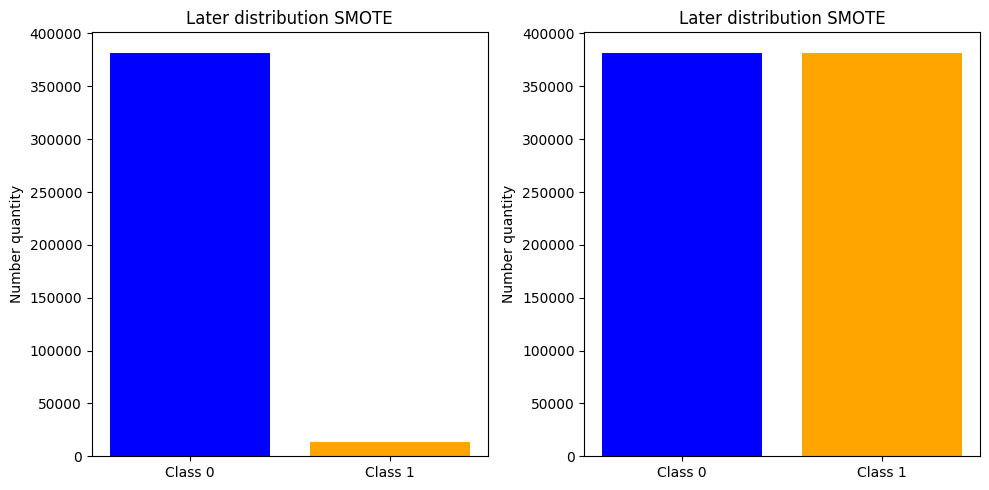

In [ ]:
plt.figure(figsize=(10, 5))

# First SMOTE
plt.subplot(1, 2, 1)
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange'])
plt.title("Later distribution SMOTE")
plt.xticks([0, 1], labels=["Class 0", "Class 1"])
plt.ylabel("Number quantity")

# Later SMOTE
plt.subplot(1, 2, 2)
plt.bar(Counter(y_train_resampled).keys(), Counter(y_train_resampled).values(), color=['blue', 'orange'])
plt.title("Later distribution SMOTE")
plt.xticks([0, 1], labels=["Class 0", "Class 1"])
plt.ylabel("Number quantity")

plt.tight_layout()
plt.show()

##Model Building

####Logistic Regression Model implementation

In [ ]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.759697042780392


Logistic Regression Model Performance

In [ ]:
y_pred = lr_model.predict(X_test)

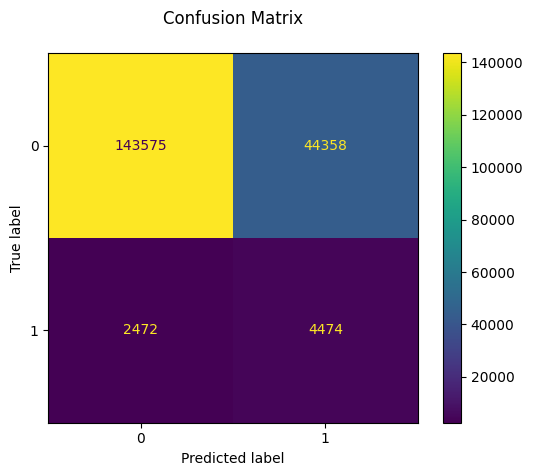

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.76      0.86    187933
           1       0.09      0.64      0.16      6946

    accuracy                           0.76    194879
   macro avg       0.54      0.70      0.51    194879
weighted avg       0.95      0.76      0.83    194879



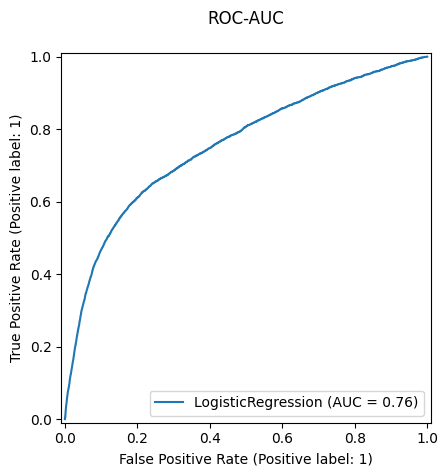

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

##RandomForest Algorithm implemetation

In [ ]:
rf = RandomForestClassifier(class_weight="balanced")

In [ ]:
rf_model = rf.fit(X_train, y_train)

In [ ]:
rf_model.score(X_test, y_test)

0.9768728287809358

Tuning the Hyperparameters of RandomForest Model

In [ ]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
}

In [ ]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)

In [ ]:
est = rf_rs.fit(X_train, y_train)

In [ ]:
est.score(X_test, y_test)

0.7866060478553358

In [ ]:
est.best_params_

{'n_estimators': 130,
 'min_samples_split': 4,
 'min_samples_leaf': 20,
 'max_leaf_nodes': 5,
 'max_depth': 2}

In [ ]:
est.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=5,
                       min_samples_leaf=20, min_samples_split=4,
                       n_estimators=130)

####Random Forest Model Performance

In [ ]:
y_pred = est.predict(X_test)

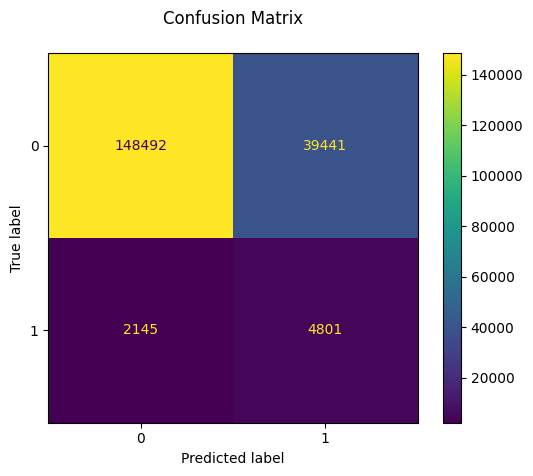

In [ ]:
ConfusionMatrixDisplay.from_estimator(est, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [ ]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.79      0.88    187933
           1       0.11      0.69      0.19      6946

    accuracy                           0.79    194879
   macro avg       0.55      0.74      0.53    194879
weighted avg       0.95      0.79      0.85    194879



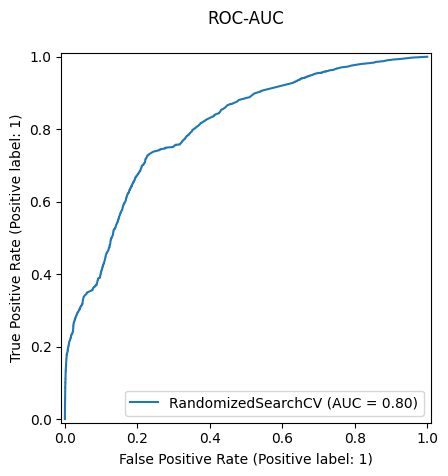

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(est, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()